b'\r\n'
b'0-1:9920.60\r\n'
b'0-2:9911.98\r\n'
将手环静置于水中进行校准


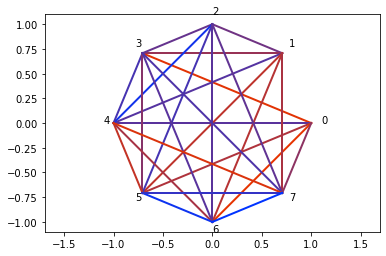

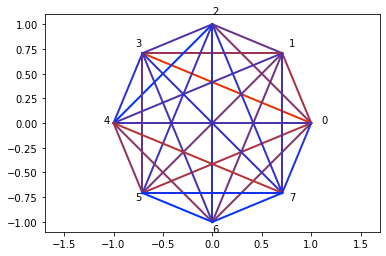

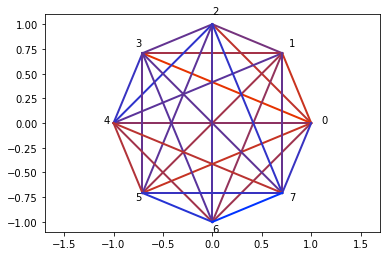

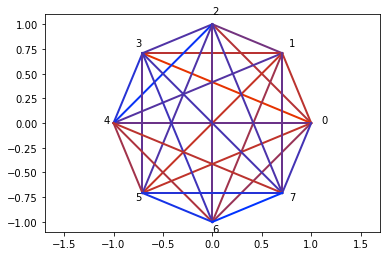

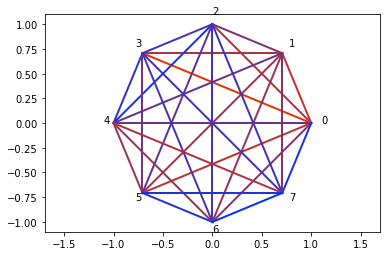

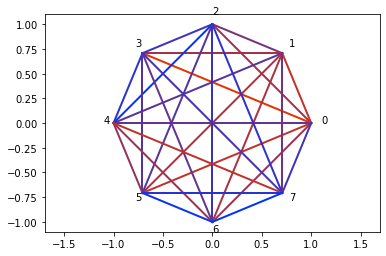

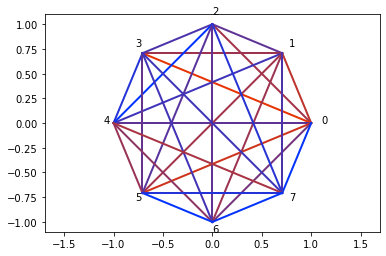

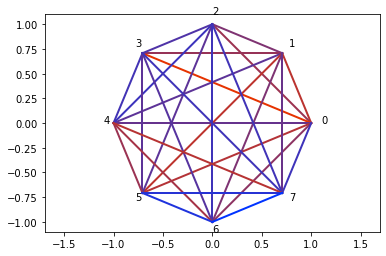

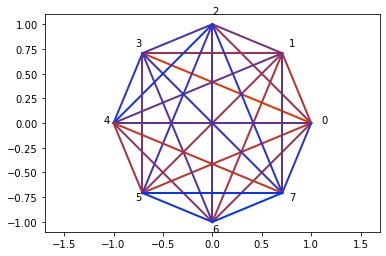

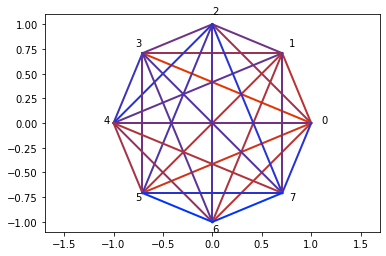

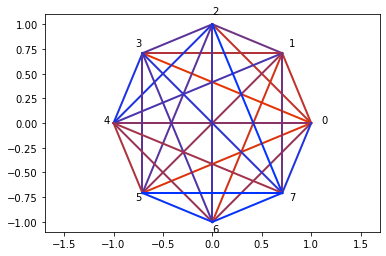

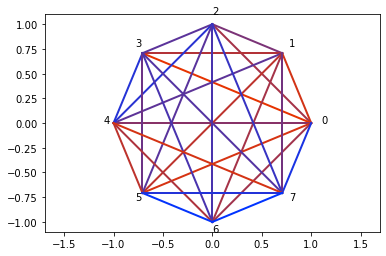

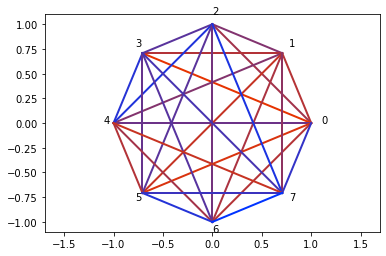

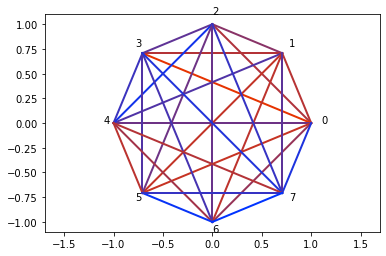

放置物体开始测量


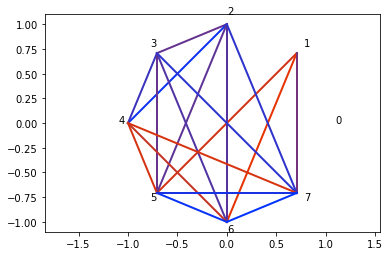

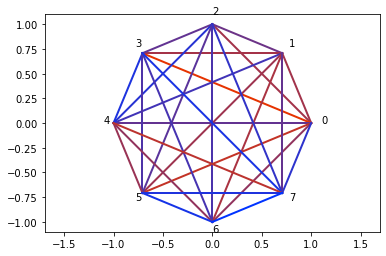

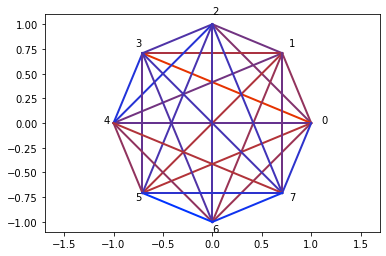

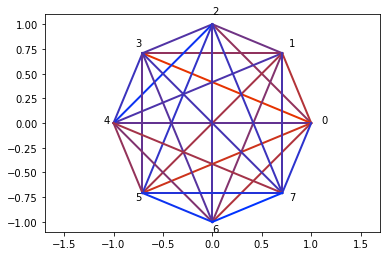

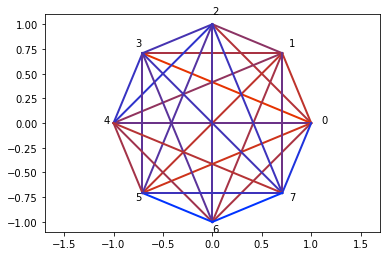

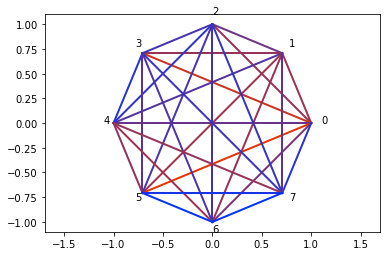

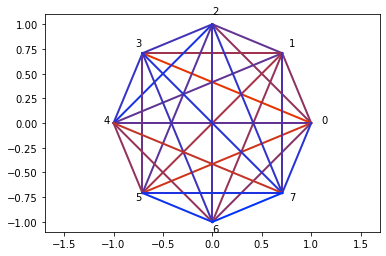

展示测量结果


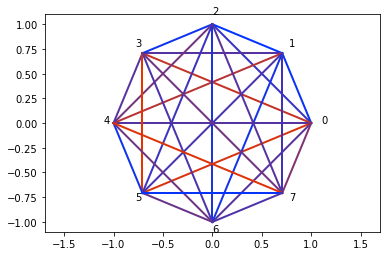

In [4]:
import serial
import serial.tools.list_ports
import plotly.express as px
import matplotlib.pyplot as plt
import math
import numpy as np
from plotlines import plotlines
port = 'COM4'
# ser = serial.Serial(port)
# print(ser)

baudrate = 115200  # 设置波特率

timeout = 1
with serial.Serial(port, baudrate, timeout=timeout) as ser:
    x = ser.read()          # read one byte
    s = ser.read(10)        # read up to ten bytes (timeout)
    line = ser.readline()   # read a '\n' terminated line
    line1 = ser.readline()
    line2 = ser.readline()
    print(line)
    print(line1)
    print(line2)
    
    # x = line2.strip()
    # print(x)
    # print(chr(x[3]))
    # print(chr(x[3]) == ':')
    # print(list(x))
    # y = x[4:(len(x)-1)]
    # print(float(y.decode('ascii')))

    # if chr(x[1]) == '-' and chr(x[3]) == ':': # 检查是否是阻抗数据
    #     item = [x[0]-48, x[2]-48]
    #     y = x[4:(len(x)-1)]
    #     item.append(float(y.decode('ascii')))
    #     print(item)
    data_timex = []
    serial_idx = 0    
    time_idx = 0
    data_dict = {}
    data_dict_test = {}
    print("将手环静置于水中进行校准")
    while serial_idx < 400:
        line = ser.readline()
        # print(line)
        if chr(line[1]) == '-' and chr(line[3]) == ':': # 检查是否是阻抗数据
            item = [line[0]-48, line[2]-48] # 输出对应的电极编号
            y = line[4:(len(line)-1)] 
            item.append(float(y.decode('ascii'))) # 输出对应的阻抗值
            # print(item)
            data_timex.append(item)
        # if (item[0] == 0 and item[1] == 1) or (item[0] == 1 and item[1] == 0):
            
            if (item[0] == 6 and item[1] == 7) or (item[0] == 7 and item[1] == 6):
                data_dict.update({time_idx : data_timex})
                # print(data_timex)
                plotlines(data_timex)
                data_timex = []
                time_idx = time_idx + 1
        serial_idx = serial_idx + 1
    
    print("放置物体开始测量")
    num = input("开始测量，输入校准周期：")
    data_timex = []
    serial_idx = 0    
    time_idx = 0
    while serial_idx < int(num):
        line = ser.readline()
        # print(line)
        if chr(line[1]) == '-' and chr(line[3]) == ':': # 检查是否是阻抗数据
            item = [line[0]-48, line[2]-48] # 输出对应的电极编号
            y = line[4:(len(line)-1)] 
            item.append(float(y.decode('ascii'))) # 输出对应的阻抗值
            # print(item)
            data_timex.append(item)
        # if (item[0] == 0 and item[1] == 1) or (item[0] == 1 and item[1] == 0):
            
            if (item[0] == 6 and item[1] == 7) or (item[0] == 7 and item[1] == 6):
                data_dict_test.update({time_idx : data_timex})
                # print(data_timex)
                plotlines(data_timex)
                data_timex = []
                time_idx = time_idx + 1
        serial_idx = serial_idx + 1    
    # print(data_dict)

x0 = np.array(data_dict[len(data_dict)-1])
x_test = np.array(data_dict_test[len(data_dict_test)-1])
x_for = x0
x_for[:,2] = x_test[:,2] - x0[:,2]
print("展示测量结果")
plotlines(x_for)
# 数据的可视化处理
# impedance = data_dict[1]



14
28


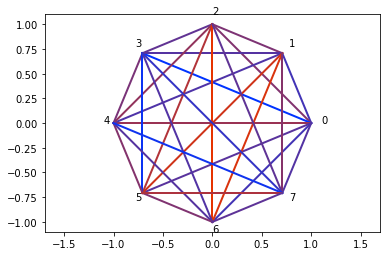

In [5]:
# ser.close()
# print(ser.is_open)
# # s = ser.read(100)
# # print(s)

# x = ser.read()          # read one byte
# s = ser.read(10)        # read up to ten bytes (timeout)
# line = ser.readline()   # read a '\n' terminated line
# print(x)
# print(len(data_timex))


print(len(data_dict))
x1 = np.array(data_dict[len(data_dict)-1])
x2 = np.array(data_dict[1])

dx3 = x1[:,2] - x2[:,2]
dx = x1
dx[:,2] = dx3
print(len(dx))

plotlines(dx)


In [6]:
# original_comports_list = list(serial.tools.list_ports.comports())
# comport_list = []

# occupied_comport =[]

# original_comports_list = list(serial.tools.list_ports.comports())
# if original_comports_list is not None:
#     for i in range(len(original_comports_list)):
#         comports = str(original_comports_list[i]).split('-')  #split一下会得到COMX这样的信息
#         comport_list.append(comports[0])
# else:
#     print("no comports")

# print(comport_list)

# if len(comport_list) > 1: # 需要不止包含com1
#     for comport in comport_list:
#         s = serial.Serial(comport, baudrate="9600", timeout=0.8)